In [1]:
# Import necessary Python packages
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools

In [2]:
# Define necessary parameters (as constants)
X              = 10                # number of photons flowing into the detector system (positive integer)
P_D            = 1e-6              # dark count probability (real number between 0 and 1)
ETA            = 0.1               # detector efficiency (real number between 0 and 1)
MU             = 0.02              # mean number of photons detected on some time interval (positive real number)
P_AB           = 0                 # probability of detecting the coincidence A B (real number between 0 and 1)
P_A_BAR_B      = 0.5               # probability of detecting the coincidence A-bar B (real number between 0 and 1)
P_A_B_BAR      = 0.5               # probability of detecting the coincidence A B-bar (real number between 0 and 1)
P_A_BAR_B_BAR  = 0                 # probability of detecting the coincidence A-bar B-bar (real number between 0 and 1)
P_A            = P_AB + P_A_B_BAR  # probability of detecting one basis A (real number between 0 and 1)
P_B            = P_AB + P_A_BAR_B  # probability of detecting one basis B (real number between 0 and 1)
PROBABILITIES  = [P_AB, P_A_BAR_B, P_A_B_BAR, P_A_BAR_B_BAR]

In [3]:
def partitions(k, n):
    masks = np.identity(k, dtype=int)
    for c in itertools.combinations_with_replacement(masks, n):
        yield sum(c)

def multinomial(photon, prob):
    multinomial_coeff = math.factorial(sum(photon)) / (math.factorial(photon[0]) * math.factorial(photon[1]) * math.factorial(photon[2]) * math.factorial(photon[3]))
    prob_coeff = prob[0]**photon[0] * prob[1]**photon[1] * prob[2]**photon[2] * prob[3]**photon[3]
    return multinomial_coeff * prob_coeff

In [4]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_2_error(p_d, eta, mu):
    case2_approx = (1 - p_d)**2 * np.exp(mu * ((1 - eta)**2 - 1)) * ((p_d + mu * P_A * eta) * (p_d + mu * P_B * eta) + mu * P_AB * eta**2)
    case2_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_2 = (1 - p_d)**2 * (1 - eta)**(2 * photons[3] + photons[1] + photons[2]) * (1 - (1 - p_d) * (1 - eta)**(photons[0] + photons[2])) * (1 - (1 - p_d) * (1 - eta)**(photons[0] + photons[1]))
            sum_multinomial += single_coin_2 * multinomial(photons, PROBABILITIES)
        case2_actual += np.exp(-mu) * (mu**x / math.factorial(x)) * sum_multinomial
    error_2 = np.abs(case2_actual - case2_approx) / case2_actual * 100
    return error_2

In [5]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_3_error(p_d, eta, mu):
    case3_approx = (p_d + (1 - 2 * p_d) * mu * P_A * eta) * (p_d + (1 - 2 * p_d) * mu * P_B * eta) + (1 - 2 * p_d)**2 * mu * P_AB * eta**2
    case3_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_3 = (1 - eta)**(2 * photons[0] + photons[1] + photons[2] - 2) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[2]) * eta) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[1]) * eta)
            sum_multinomial += single_coin_3 * multinomial(photons, PROBABILITIES)
        case3_actual += np.exp(-mu) * (mu**x / math.factorial(x)) * sum_multinomial
    error_3 = np.abs(case3_actual - case3_approx) / case3_actual * 100
    return error_3

In [6]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_4_error(p_d, eta, mu):
    case4_approx = (p_d + (1 - p_d) * mu * P_A * eta) * (p_d + (1 - p_d) * mu * P_B * eta) + (1 - p_d)**2 * mu * P_AB * eta**2
    case4_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_4 = (p_d + (1 - p_d) * (1 - (1 - eta)**(photons[0] + photons[2]))) * (p_d + (1 - p_d) * (1 - (1 - eta)**(photons[0] + photons[1])))
            sum_multinomial += single_coin_4 * multinomial(photons, PROBABILITIES)
        case4_actual += np.exp(-mu) * mu**x / math.factorial(x) * sum_multinomial
    error_4 = np.abs(case4_actual - case4_approx) / case4_actual * 100
    return error_4

In [7]:
# Error bound based on varying dark count probability
error_2_PD = []
error_3_PD = []
error_4_PD = []
range_PD = np.arange(0.001, 1, 0.001)
for p_d in range_PD:
    error_2_PD.append(case_2_error(p_d, ETA, MU))
    error_3_PD.append(case_3_error(p_d, ETA, MU))
    error_4_PD.append(case_4_error(p_d, ETA, MU))
print(error_2_PD)
print(error_3_PD)
print(error_4_PD)

[10.756087827027432, 6.98556455889609, 5.172100222232616, 4.1060667200311585, 3.404356946936963, 2.90747029353517, 2.5371519155786713, 2.2505067305684654, 2.0220551260690747, 1.8357091660398106, 1.6808105916383935, 1.550018441139755, 1.4381116347398808, 1.341275296189437, 1.256657203353769, 1.182082161874332, 1.115862378181742, 1.0566681858109095, 1.003437843680885, 0.955313289748377, 0.9115935354520402, 0.8717002971503823, 0.8351522732192128, 0.8015456315623953, 0.7705390258949846, 0.7418419601773434, 0.7152056596972309, 0.6904158406293982, 0.6672869328898898, 0.6456574265390211, 0.6253860948105687, 0.6063489069736878, 0.5884364883785523, 0.571552017783586, 0.5556094765822578, 0.5405321830867013, 0.5262515591506067, 0.5127060872693826, 0.499840424700297, 0.48760464769586215, 0.47595360408840165, 0.46484635652572476, 0.4542457018866857, 0.4441177549881205, 0.4344315867669231, 0.4251589087987488, 0.4162737973742922, 0.4077524514659236, 0.3995729798243022, 0.39171521319666563, 0.38416053

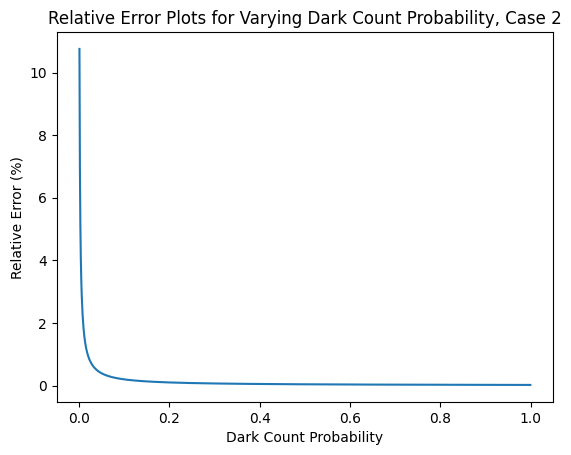

In [8]:
plt.plot(range_PD, error_2_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Dark Count Probability, Case 2')
plt.savefig("relative_error_2_PD_2.png")
plt.show()

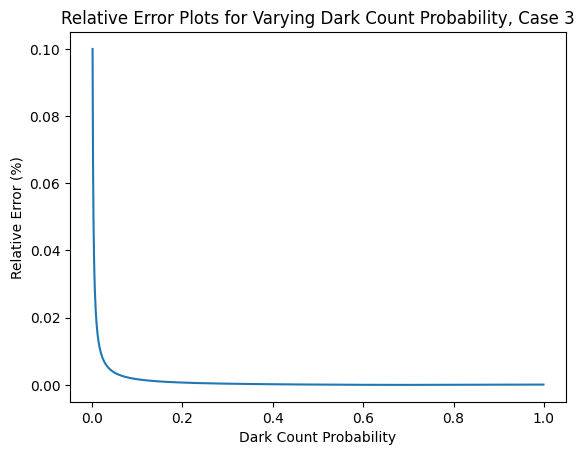

In [9]:
plt.plot(range_PD, error_3_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Dark Count Probability, Case 3')
plt.savefig("relative_error_3_PD_2.png")
plt.show()

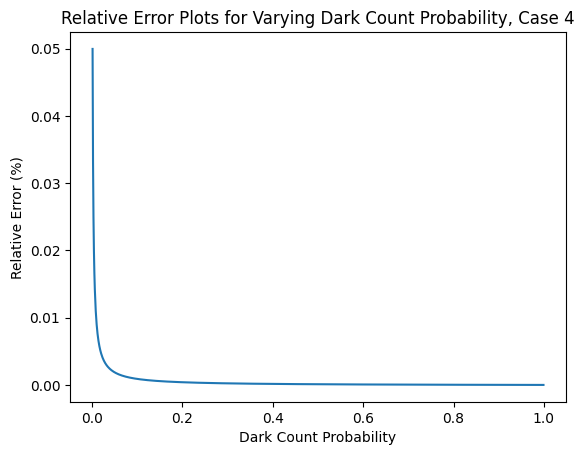

In [10]:
plt.plot(range_PD, error_4_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Dark Count Probability, Case 4')
plt.savefig("relative_error_4_PD_2.png")
plt.show()

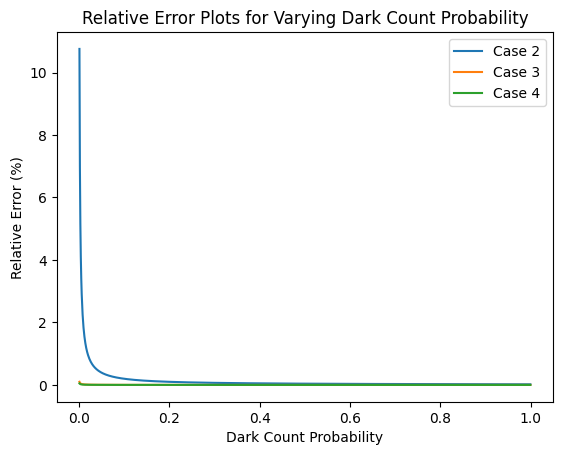

In [11]:
# Plot error bound based on varying dark count probability
plt.plot(range_PD, error_2_PD, label = 'Case 2')
plt.plot(range_PD, error_3_PD, label = 'Case 3')
plt.plot(range_PD, error_4_PD, label = 'Case 4')
plt.xlabel('Dark Count Probability')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Dark Count Probability')
plt.legend()
plt.savefig("relative_error_PD_2.png")
plt.show()
# plt.close()

In [12]:
# Error bound based on varying detector efficiency
error_2_eta = []
error_3_eta = []
error_4_eta = []
range_eta = np.arange(0.001, 1, 0.001)
for eta in range_eta:
    error_2_eta.append(case_2_error(P_D, eta, MU))
    error_3_eta.append(case_3_error(P_D, eta, MU))
    error_4_eta.append(case_4_error(P_D, eta, MU))
print(error_2_eta)
print(error_3_eta)
print(error_4_eta)

[0.1811566666826758, 0.3801355686727422, 0.5802725212294323, 0.7811635043190627, 0.9827232898442675, 1.1849241462090294, 1.387755356435387, 1.591212722998202, 1.7952949925861852, 2.000002404828513, 2.205336025523987, 2.4112974105580043, 2.617888423768953, 2.8251111323615508, 3.0329677439004836, 3.2414605668288146, 3.4505919848536877, 3.660364439858462, 3.870780420200828, 4.081842452540106, 4.293553096001558, 4.505914937953925, 4.718930590899515, 4.9326026901701505, 5.1469338921844505, 5.361926873131437, 5.577584327959553, 5.793908969609389, 6.01090352841391, 6.228570751642081, 6.44691340314183, 6.6659342630760925, 6.88563612771451, 7.106021809283697, 7.327094135853843, 7.548855951267481, 7.771310115088211, 7.994459502576226, 8.218307004679712, 8.442855528046756, 8.668107995045334, 8.894067343797142, 9.12073652821801, 9.348118518071551, 9.576216299024107, 9.805032872709047, 10.034571256792782, 10.264834485051209, 10.495825607444077, 10.727547690196516, 10.960003815880752, 11.19319708350

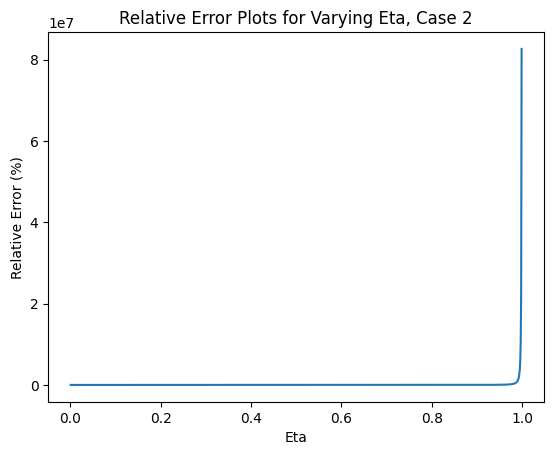

In [13]:
plt.plot(range_eta, error_2_eta)
plt.xlabel('Eta')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Eta, Case 2')
plt.savefig("relative_error_2_eta_2.png")
plt.show()

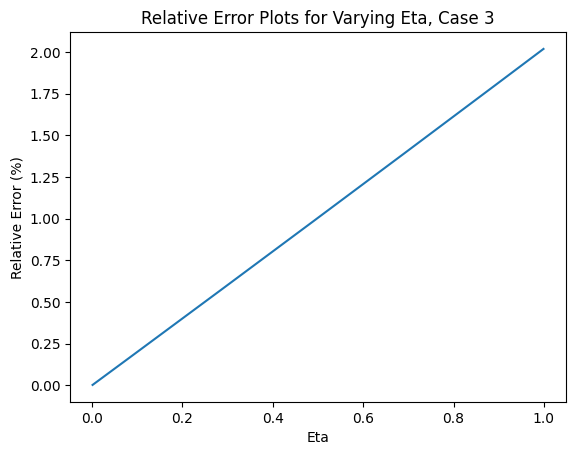

In [14]:
plt.plot(range_eta, error_3_eta)
plt.xlabel('Eta')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Eta, Case 3')
plt.savefig("relative_error_3_eta_2.png")
plt.show()

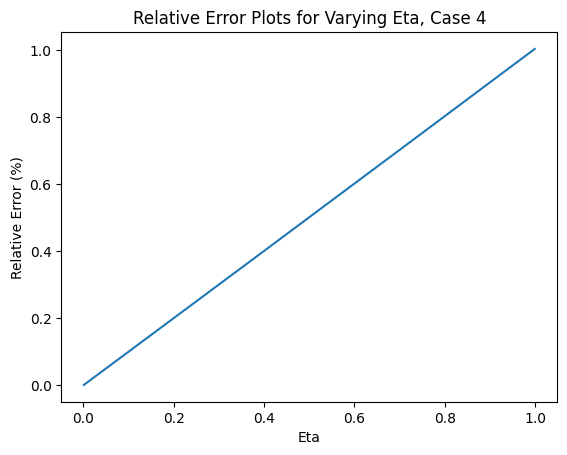

In [15]:
plt.plot(range_eta, error_4_eta)
plt.xlabel('Eta')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Eta, Case 4')
plt.savefig("relative_error_4_eta_2.png")
plt.show()

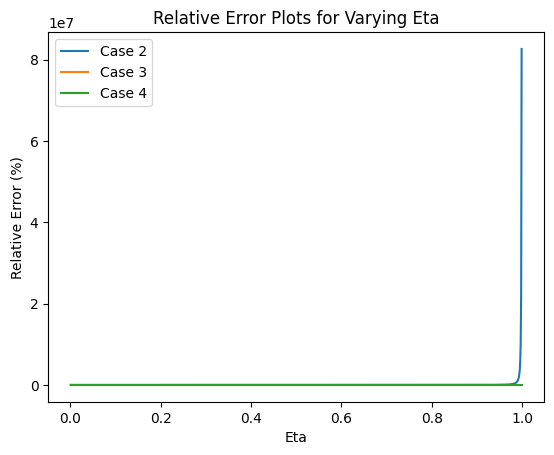

In [16]:
# Plot error bound based on varying detector efficiency
plt.plot(range_eta, error_2_eta, label = 'Case 2')
plt.plot(range_eta, error_3_eta, label = 'Case 3')
plt.plot(range_eta, error_4_eta, label = 'Case 4')
plt.xlabel('Eta')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Eta')
plt.legend()
plt.savefig("relative_error_eta_2.png")
plt.show()
# plt.close()

In [17]:
# Error bound based on varying mean number of photons detected on some time interval
error_2_mu = []
error_3_mu = []
error_4_mu = []
range_mu = np.arange(0.001, 1, 0.001)
for mu in range_mu:
    error_2_mu.append(case_2_error(P_D, ETA, mu))
    error_3_mu.append(case_3_error(P_D, ETA, mu))
    error_4_mu.append(case_4_error(P_D, ETA, mu))
print(error_2_mu)
print(error_3_mu)
print(error_4_mu)

[22.915193833465434, 23.17464113356594, 23.258783888022766, 23.298338068936996, 23.319932668317982, 23.332512792791174, 23.339929042157905, 23.344112315707857, 23.34613755450599, 23.34665072416634, 23.346063390940383, 23.344650198572563, 23.3426014364472, 23.340053116016925, 23.337105035345125, 23.33383207931043, 23.33029153697035, 23.32652798296135, 23.322576619295184, 23.318465615784355, 23.31421778251742, 23.30985178668662, 23.305383052305686, 23.300824435214977, 23.296186736237843, 23.291479096021245, 23.28670930221095, 23.281884030857224, 23.27700903791543, 23.272089312476034, 23.26712920035912, 23.262132504552557, 23.257102567400995, 23.252042338300953, 23.246954429799292, 23.24184116434685, 23.236704613476665, 23.23154663079876, 23.226368879922436, 23.221172858192464, 23.215959916953864, 23.210731278922854, 23.205488053135845, 23.200231247860778, 23.19496178178756, 23.189680493760328, 23.18438815126684, 23.17908545786831, 23.17377305971914, 23.168451551305246, 23.163121480506994

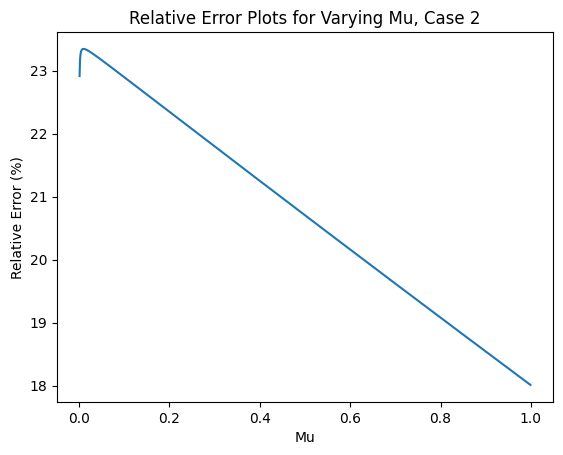

In [18]:
plt.plot(range_mu, error_2_mu)
plt.xlabel('Mu')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Mu, Case 2')
plt.savefig("relative_error_2_mu_2.png")
plt.show()

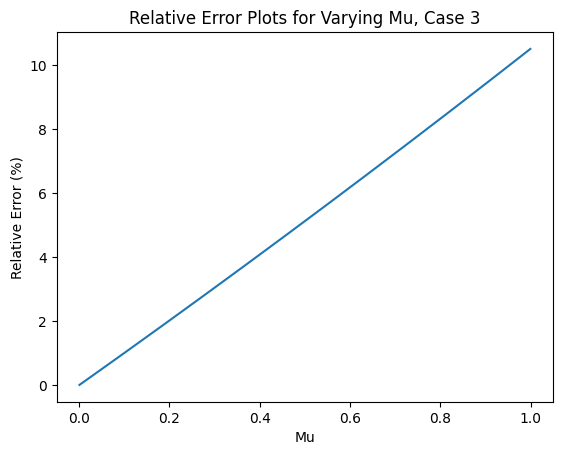

In [19]:
plt.plot(range_mu, error_3_mu)
plt.xlabel('Mu')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Mu, Case 3')
plt.savefig("relative_error_3_mu_2.png")
plt.show()

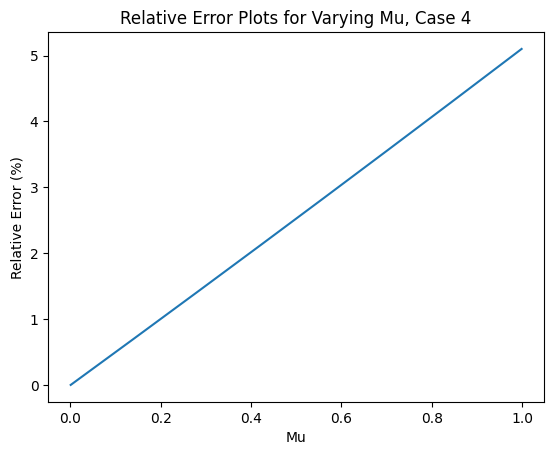

In [20]:
plt.plot(range_mu, error_4_mu)
plt.xlabel('Mu')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Mu, Case 4')
plt.savefig("relative_error_4_mu_2.png")
plt.show()

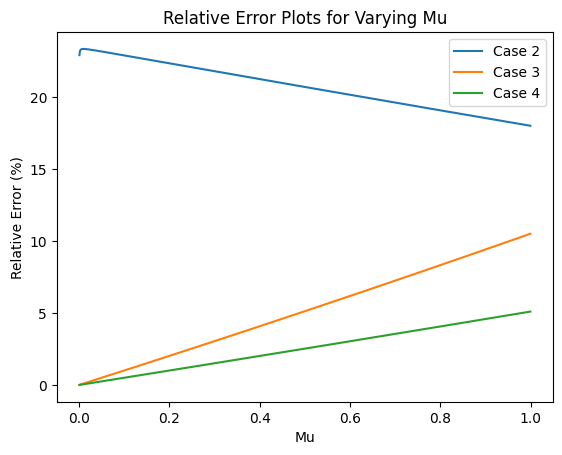

In [21]:
# Plot fidelities based on varying mean number of photons detected on some time interval
plt.plot(range_mu, error_2_mu, label = 'Case 2')
plt.plot(range_mu, error_3_mu, label = 'Case 3')
plt.plot(range_mu, error_4_mu, label = 'Case 4')
plt.xlabel('Mu')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Mu')
plt.legend()
plt.savefig("relative_error_mu_2.png")
plt.show()
# plt.close()